In [1]:
# 1. Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 2. Đọc dữ liệu
# Thay tên file của bạn vào đây
file_path = 'C:/Users/acer/OneDrive - Trường ĐH CNTT - University of Information Technology/NCKH/Machine Learning_Python/Data/diabetes.csv'
data = pd.read_csv(file_path)

In [3]:
# 3. Tách biến đầu vào (X) và biến mục tiêu (y)
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]
y = data['Outcome']

In [4]:
# 4. Chia dữ liệu: 80% Train - 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 5. Huấn luyện mô hình Gaussian Naive Bayes
# Lưu ý: Naive Bayes không nhất thiết phải Scale dữ liệu (StandardScaler) 
# vì nó tính toán dựa trên Trung bình và Phương sai của từng cột độc lập.
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [6]:
# 6. Dự đoán
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Lấy xác suất của lớp 1 (Bệnh)

In [7]:
# 7. --- SO SÁNH VỚI EXCEL CỦA BẠN ---
# Để kiểm tra xem Excel bạn tính Mean và Stdev đúng chưa, hãy xem các thông số này:
print("--- THÔNG SỐ MÔ HÌNH HỌC ĐƯỢC ---")
print("Giá trị Trung bình (Mean) của từng biến ứng với 2 lớp (0 và 1):")
# Hàng 0 là Mean của người khỏe, Hàng 1 là Mean của người bệnh
print(pd.DataFrame(model.theta_, columns=feature_cols, index=['Class 0 (Khỏe)', 'Class 1 (Bệnh)']))

print("\nPhương sai (Variance - bình phương của Stdev) của từng biến:")
print(pd.DataFrame(model.var_, columns=feature_cols, index=['Class 0', 'Class 1']))

--- THÔNG SỐ MÔ HÌNH HỌC ĐƯỢC ---
Giá trị Trung bình (Mean) của từng biến ứng với 2 lớp (0 và 1):
                Pregnancies     Glucose  BloodPressure  SkinThickness  \
Class 0 (Khỏe)     3.241895  110.214464      68.309227      19.748130   
Class 1 (Bệnh)     4.685446  140.887324      71.497653      21.624413   

                  Insulin        BMI  DiabetesPedigreeFunction        Age  
Class 0 (Khỏe)  72.254364  30.256608                  0.431254  30.556110  
Class 1 (Bệnh)  98.727700  35.234272                  0.540545  37.333333  

Phương sai (Variance - bình phương của Stdev) của từng biến:
         Pregnancies      Glucose  BloodPressure  SkinThickness       Insulin  \
Class 0     9.136014   676.637311     311.265988     212.088695  10207.700898   
Class 1    13.032525  1065.161027     393.677238     283.962234  19207.409434   

               BMI  DiabetesPedigreeFunction         Age  
Class 0  56.692644                  0.094088  122.531154  
Class 1  49.524989            

In [8]:
# 8. Đánh giá kết quả
print("\n--- KẾT QUẢ ĐÁNH GIÁ ---")
acc = accuracy_score(y_test, y_pred)
print(f"Độ chính xác (Accuracy): {acc*100:.2f}%")

print("\nBáo cáo chi tiết:")
print(classification_report(y_test, y_pred))


--- KẾT QUẢ ĐÁNH GIÁ ---
Độ chính xác (Accuracy): 76.62%

Báo cáo chi tiết:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



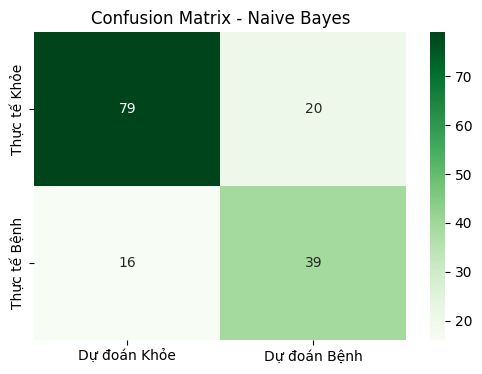

In [9]:
# 9. Vẽ Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Dự đoán Khỏe', 'Dự đoán Bệnh'], 
            yticklabels=['Thực tế Khỏe', 'Thực tế Bệnh'])
plt.title('Confusion Matrix - Naive Bayes')
plt.show()